In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msn
import os
import joblib
import tarfile
import urllib


from sklearn import datasets

# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, confusion_matrix

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

## Download the Data & Look at the big Picture (MNIST data)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist_df = pd.DataFrame(np.c_[mnist['data'], mnist['target']], columns=mnist.feature_names+['target'])
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
mnist_df.shape

(70000, 785)

In [6]:
mnist_df = mnist_df.astype(np.int)

In [7]:
X = mnist_df.iloc[:,:-1]
y = mnist_df.iloc[:,-1]

X.shape, y.shape

((70000, 784), (70000,))

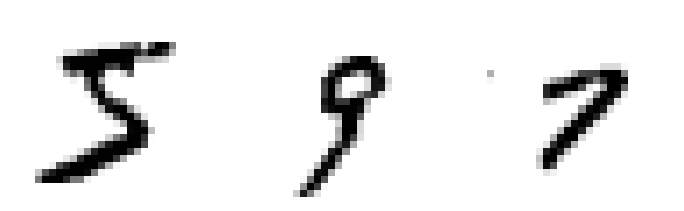

In [8]:
## Show some results

x_row1 = np.asarray(X.iloc[0]).reshape(28,28)
x_row20 = np.asarray(X.iloc[19]).reshape(28,28)
x_row30 = np.asarray(X.iloc[29]).reshape(28,28)

fig, ax = plt.subplots(1, 3, figsize=(12,7))
ax[0].imshow(x_row1, cmap='binary')
ax[1].imshow(x_row20, cmap='binary')
ax[2].imshow(x_row30, cmap='binary')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

## Split the Data

In [9]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]  

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Ok, Let's try Binary Classification (for 5s)

## using SGDClassifier

In [11]:
y_trian_5 = (y_train==5)
y_test_5 = (y_test==5)

In [12]:
sgd_binary = SGDClassifier(random_state=42)

In [13]:
## Using cross validation to check accuracy insted of making x_val

sgd_binary_scores = cross_val_score(sgd_binary, X_train, y_trian_5, 
                                    cv=10, scoring='accuracy', n_jobs=-1)

In [14]:
# but is not much accuarate , as we test for 5s and most contains only 10% of 5s 
# so there is much more metrics to get the performance of model

print('sgd_binary_scores (first intuation of Model) => \n', sgd_binary_scores)
print('=='*20)
print('their Mean =>', sgd_binary_scores.mean())
print('=='*20)
print('their Mean =>', sgd_binary_scores.std())

sgd_binary_scores (first intuation of Model) => 
 [0.96416667 0.95866667 0.96416667 0.95833333 0.96733333 0.96933333
 0.96433333 0.96583333 0.9575     0.96566667]
their Mean => 0.9635333333333334
their Mean => 0.0038273866918419556


In [15]:
# using cross_val_predict to predict values with => method='predict' (default)
## study confusion matrix

y_trian_predict_5 = cross_val_predict(sgd_binary, X_train, y_trian_5, cv=5, 
                                      method='predict', n_jobs=-1)

conf_matrix =>
 [[53115  1464]
 [  916  4505]]


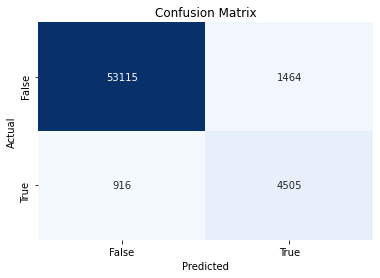

In [16]:
conf_matrix = confusion_matrix(y_trian_5, y_trian_predict_5)

print('conf_matrix =>\n', conf_matrix)

print('==='*30)


def confusion_martrix(confu_martrix):
    sns.heatmap(confu_martrix, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

confusion_martrix(conf_matrix)

In [17]:
precison_acc = precision_score(y_trian_5, y_trian_predict_5)
print('precison_accuracy =>', precison_acc)

print('==='*20)

recall_acc = recall_score(y_trian_5, y_trian_predict_5)
print('recall_accuracy =>', recall_acc)

print('==='*20)

class_repo = classification_report(y_trian_5, y_trian_predict_5)
print('classifcation report => \n', class_repo)


precison_accuracy => 0.7547327860613168
recall_accuracy => 0.8310274857037447
classifcation report => 
               precision    recall  f1-score   support

       False       0.98      0.97      0.98     54579
        True       0.75      0.83      0.79      5421

    accuracy                           0.96     60000
   macro avg       0.87      0.90      0.88     60000
weighted avg       0.96      0.96      0.96     60000



## Trade off between (Precsion & Recall)

**threshold
to get threshold of instance you can use(descison_function) for estimator
or you can use (cross_val_predict) with => method='decsion function'
it will return thresholds (descison scores)**


#### Precison , Recall, threshold curves

In [18]:
## threshold
## to get threshold of instance you can use(descison_function) for estimator
## or you can use (cross_val_predict) with => method='decsion function'
## it will return thresholds (descison scores)


y_scores = cross_val_predict(sgd_binary, X_train, y_trian_5,
                                      cv=5, method='decision_function')

In [19]:
# increasing threshold will decrease Recall & increase Precsion and vice versa

precisions_vals, recalls_vals, thresholds_vals = precision_recall_curve(y_trian_5, y_scores)

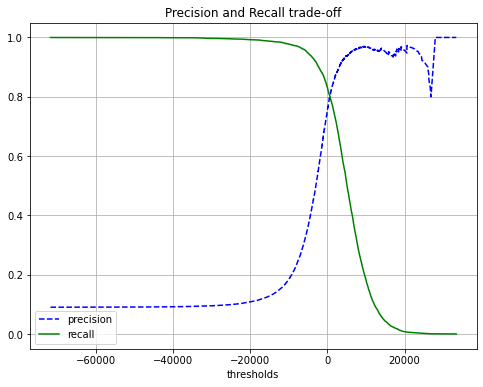

In [20]:
### precision_recall_curve vs. all possible thresholds

def plt_precision_recall_threshold_curve(precisions_vals, recalls_vals, thresholds_vals):
    plt.figure(figsize=(8,6))
    plt.plot(thresholds_vals, precisions_vals[:-1], 'b--', label='precision')
    plt.plot(thresholds_vals, recalls_vals[:-1], 'g-', label='recall')
    plt.xlabel('thresholds')
    plt.title('Precision and Recall trade-off')
    plt.grid()
    plt.legend()
    plt.show()
    
plt_precision_recall_threshold_curve(precisions_vals, recalls_vals, thresholds_vals)

#### Precison , Recall curve

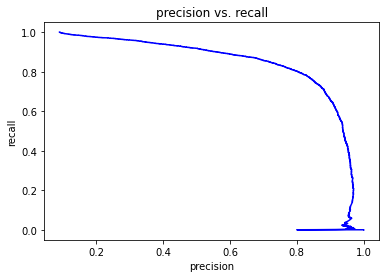

In [21]:
def plt_precision_recall_curve(precisions_vals, recalls_vals):
    plt.plot(precisions_vals, recalls_vals, 'b-')
    plt.xlabel('precision')
    plt.ylabel('recall')
    plt.title('precision vs. recall')
    plt.show()
    
plt_precision_recall_curve(precisions_vals, recalls_vals)

#### control required precsion or recall acc. to threshold

In [22]:
### what about thaking precsion above 90%

req_threshold = thresholds_vals[np.argmax(precisions_vals>=0.90)]
print('req_threshold for precision >= 0.90 ==>', req_threshold)

print('=='*40)

y_scores_90_precision = (y_scores >= req_threshold)

prec_acc_90 = precision_score(y_trian_5, y_scores_90_precision)
print('precison accuracy when threshold achieve precison >= 0.90 ==>', prec_acc_90)

print('=='*40)

recall_acc_90 = recall_score(y_trian_5, y_scores_90_precision)
print('recall accuracy when threshold achieve precison >= 0.90 ==>', recall_acc_90)


req_threshold for precision >= 0.90 ==> 3045.9258227053647
precison accuracy when threshold achieve precison >= 0.90 ==> 0.9002016129032258
recall accuracy when threshold achieve precison >= 0.90 ==> 0.6589190186312488


## ROC curve & AUC_ROC

In [23]:
# fpr is (false positive rate => (1-specficity))
# tpr is (true positve rate => (recall))

# roc_curve => reciever operationg charachterisitc
fpr, tpr, thresholds_roc = roc_curve(y_trian_5, y_scores)

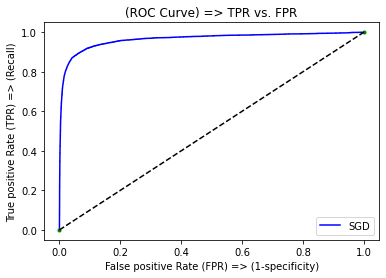

In [24]:
def plt_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'b-', label=label)
    plt.xlabel('False positive Rate (FPR) => (1-specificity)')
    plt.ylabel('True positive Rate (TPR) => (Recall)')
    plt.title('(ROC Curve) => TPR vs. FPR')
    x = [0,1]
    y = [0,1]
    plt.plot(0,0, 'g.', 1, 1, 'g.')
    plt.plot(x, y, 'k--')
    plt.legend()
    plt.show()

plt_roc_curve(fpr, tpr, label='SGD')

In [25]:
auc_score = roc_auc_score(y_trian_5, y_scores)

print('Area under curve of ROC =>', auc_score)

Area under curve of ROC => 0.9648211175804801


## using RandomForestClssifier

**get the scores by using cross_val_predict 
but random forest using cross_val_predict not have (decision function), 
it has(predict_prob)
 see what i will doing**
 
#### (decision_function) will raise error >>>> take care

In [26]:
forest_clf = RandomForestClassifier(random_state=42)

In [27]:
# get the scores by using cross_val_predict 
# but random forest using cross_val_predict not have (decision function) , it has(predict_prob)
# see what i will doing

#### (decision_function) will raise error >>>> take care

In [28]:
y_scores_forest = cross_val_predict(forest_clf, X_train, y_trian_5, cv=5, 
                                    method='predict_proba', n_jobs=-1)

## y_scors_forest returns probablity fot both classes [0,1]


# that predict (default)
y_predict_forest = cross_val_predict(forest_clf, X_train, y_trian_5, cv=5, 
                                      method='predict', n_jobs=-1)

y_scores_forest

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

In [29]:
y_scors_forest_positive = y_scores_forest[:,1]   # for positve class

### confusion Matrix & acuuracies

[[54536    43]
 [  686  4735]]


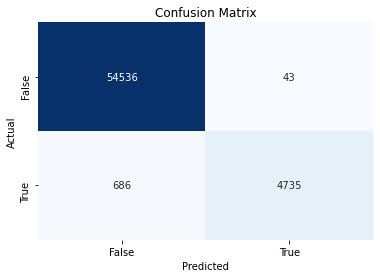

In [30]:
conf_matrix_forest = confusion_matrix(y_trian_5, y_predict_forest)

print(conf_matrix_forest)
# call the above function
confusion_martrix(conf_matrix_forest)

In [31]:
precison_acc_forest = precision_score(y_trian_5, y_predict_forest)
print('precison_acc_forest =>', precison_acc_forest)

print('==='*20)

recall_acc_forest = recall_score(y_trian_5, y_predict_forest)
print('recall_acc_forest =>', recall_acc_forest)

print('==='*20)

class_repo_forest = classification_report(y_trian_5, y_predict_forest)
print('classifcation report forest => \n', class_repo_forest)


precison_acc_forest => 0.9910004185851821
recall_acc_forest => 0.8734550820881756
classifcation report forest => 
               precision    recall  f1-score   support

       False       0.99      1.00      0.99     54579
        True       0.99      0.87      0.93      5421

    accuracy                           0.99     60000
   macro avg       0.99      0.94      0.96     60000
weighted avg       0.99      0.99      0.99     60000



### roc & auc

In [32]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_trian_5, y_scors_forest_positive)

In [33]:
auc_forest = roc_auc_score(y_trian_5, y_scors_forest_positive)

print('Area under curve for random forest =>', auc_forest)  # better than SGDClassifier

Area under curve for random forest => 0.998402186461512


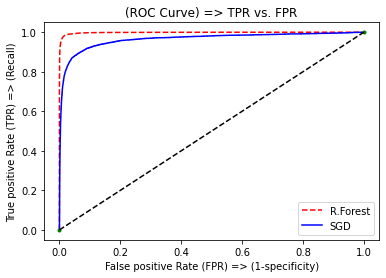

In [34]:
plt.plot(fpr_forest, tpr_forest, 'r--', label='R.Forest')
plt_roc_curve(fpr, tpr, label='SGD')
plt.show()

## MultiClass Classification

**you already know about OVR & OVO**

scikit-learn use ovo by default

### Using SVC

classifier used ovr , and it got score for each class, select the highet one

In [35]:
# svc_clf = SVC(probability=True) # probability=True to be able to get predict_proba
svc_clf = SVC()

In [36]:
svc_clf.fit(X_train, y_train)  # multiclass (note y_train all)

SVC()

In [37]:
y_predict_first_row = svc_clf.predict(X_train[0:1])  # here it predicts 5 as excpects

print('y_predict_first_row =>', y_predict_first_row)

y_predict_first_row => [5]


In [38]:
## classifier used ovo , and it got score for each class, select the highet one

## you can get these scores using (decision function) or 
# when you use (cross_val_predict) choose method(decsion function or predict_prob) acc to Algoritm

In [39]:
y_scores_first_row = svc_clf.decision_function(X_train[0:1])

y_scores_first_row = np.squeeze(y_scores_first_row)

print('y_score_first_row =>\n', y_scores_first_row)
print('=='*20)
print(f'get Max score at idx "{np.argmax(y_scores_first_row)}" is equal to =>', 
                          y_scores_first_row[np.argmax(y_scores_first_row)]) # which is class 5 

y_score_first_row =>
 [ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
  1.70975103  2.76765202  6.23049537  4.84771048]
get Max score at idx "5" is equal to => 9.313248199189204


#### using cross_val

In [40]:
y_val_scores_svc = cross_val_score(svc_clf, X_train, y_train, 
                                   cv=5, scoring='accuracy', n_jobs=-1)

In [41]:
print('scores calcualtes for  SVC (multiClssification) =>\n', y_val_scores_svc)
print('Their Mean =>', y_val_scores_svc.mean())
print('their std =>', y_val_scores_svc.std())

scores calcualtes for  SVC (multiClssification) =>
 [0.97941667 0.97633333 0.97616667 0.97416667 0.97858333]
Their Mean => 0.9769333333333334
their std => 0.0018703832049431588


In [42]:
# predict
y_predict_scores_svc = cross_val_predict(svc_clf, X_train, y_train, 
                                           cv=5, method='predict', n_jobs=-1)

In [43]:
y_predict_scores_svc

array([5, 0, 4, ..., 5, 6, 8])

In [44]:
conf_matrix_multi_svc = confusion_matrix(y_train, y_predict_scores_svc)
print('conf_matrix_multi_svc =>\n', conf_matrix_multi_svc)

conf_matrix_multi_svc =>
 [[5866    3   10    2    3    7   15    1   11    5]
 [   1 6672   24    8    9    0    2   11    7    8]
 [  14    8 5822   18   22    5    9   28   27    5]
 [   3   10   53 5907    2   55    1   29   54   17]
 [   5   11   14    0 5711    0   21   10    6   64]
 [  12    4    8   57   11 5265   33    2   19   10]
 [  18    6    8    0    7   23 5845    0   11    0]
 [   4   23   35    4   32    2    0 6120    5   40]
 [   9   24   16   35   18   33   17    5 5674   20]
 [  15    9    4   28   69   16    1   53   20 5734]]


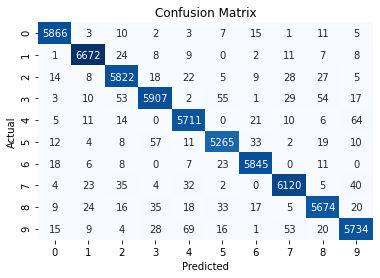

In [45]:
def confusion_martrix_multi(confu_martrix):
    sns.heatmap(confu_martrix, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xticks(ticks=np.arange(confu_martrix.shape[0]) + 0.5, labels=np.arange(10))
    plt.yticks(ticks=np.arange(confu_martrix.shape[1]) + 0.5, labels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

confusion_martrix_multi(conf_matrix_multi_svc)

In [46]:
precison_acc_multi = precision_score(y_train, y_predict_scores_svc, average='micro')
print('precison_acc_multi => ', precison_acc_multi)

print('==='*20)

recall_acc_multi = recall_score(y_train, y_predict_scores_svc, average='micro')
print('recall_acc_multi =>', recall_acc_multi)

print('==='*20)

class_repo_multi = classification_report(y_train, y_predict_scores_svc)
print('classifcation report multi => \n', class_repo_multi)


precison_acc_multi =>  0.9769333333333333
recall_acc_multi => 0.9769333333333333
classifcation report multi => 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.97      0.98      0.97      5958
           3       0.97      0.96      0.97      6131
           4       0.97      0.98      0.97      5842
           5       0.97      0.97      0.97      5421
           6       0.98      0.99      0.99      5918
           7       0.98      0.98      0.98      6265
           8       0.97      0.97      0.97      5851
           9       0.97      0.96      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



#### Error Analysis

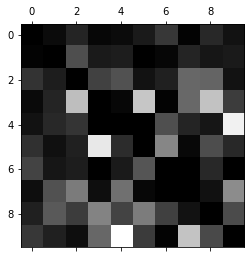

In [47]:
row_sums = conf_matrix_multi_svc.sum(axis=1, keepdims=True)

norm_conf_sum = conf_matrix_multi_svc / row_sums

## fill diagonal with 0s
np.fill_diagonal(norm_conf_sum, 0)
plt.matshow(norm_conf_sum, cmap=plt.cm.gray)
plt.show()

### predict_proba

In [49]:
# predict_proba
y_predict_proba_scores_svc = cross_val_predict(svc_clf, X_train, y_train, 
                                           cv=2, method='decision_function', n_jobs=-1)

In [52]:
df_scores = pd.DataFrame(y_predict_proba_scores_svc)
df_scores.head()

,0,1,2,3,4,5,6,7,8,9
0,2.734121,0.727063,7.223338,8.305892,-0.308536,9.311002,2.717786,3.770629,6.220300,3.900804
1,9.315706,-0.303162,7.253881,3.834180,0.697042,8.283113,3.783048,2.737182,6.189886,2.802017
2,0.722247,-0.295301,5.201638,5.148147,9.300645,4.902715,2.784810,7.239452,1.737356,8.274144
3,-0.305275,9.310345,7.249434,4.789419,3.778767,1.761592,0.723930,8.248225,6.289133,2.732940
4,-0.304154,2.733947,2.720905,4.802536,8.303394,2.758613,0.699404,7.261989,6.261634,9.312920


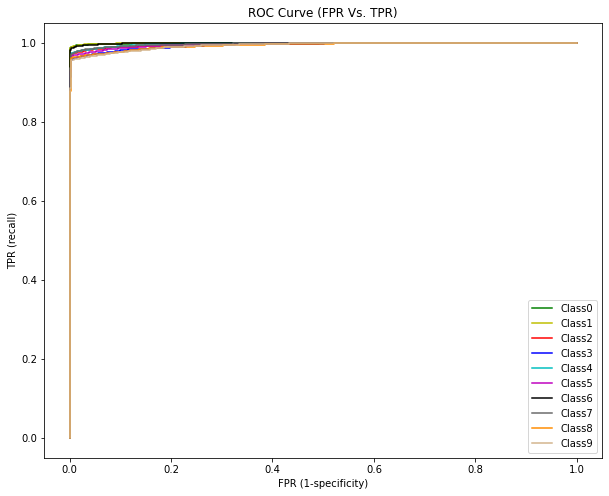

In [59]:
fpr_dict = {}
tpr_dict = {}
threshold_dict = {}

for i in range(10):
    fpr_dict[i], tpr_dict[i], threshold_dict[i] = roc_curve(y_train==i, df_scores.iloc[:,i])


plt.figure(figsize=(10,8))
colors = ['g','y','r','b','c','m','k','dimgray','darkorange', 'tan']
for i in range(10):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class{i}', c=colors[i])
    
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR (recall)')
plt.title('ROC Curve (FPR Vs. TPR)')
plt.legend()
plt.show()

#### get auc

In [ ]:
y_predict_proba_scores_svc

In [63]:
# predict_probas to be able to calculate auc
y_predict_proba_scores_svc = cross_val_predict(svc_clf, X_train, y_train, 
                                              cv=2, method='predict_proba', n_jobs=-1)

### it will raise an error to solve it you should make >> SVC(probability=True)
### but it will take much time to run, i will continue, but you now know the idea

AttributeError: predict_proba is not available when  probability=False

In [ ]:
df_scores_prob = pd.DataFrame(y_predict_proba_scores_svc)

In [ ]:
auc_total = roc_auc_score(y_train, y_predict_proba_scores_svc, multi_class='ovo')
print('auc_total =>', auc_total)

## Evalute on Test set

In [64]:
y_predict_test = svc_clf.predict(X_test)

In [65]:
score_test = accuracy_score(y_test, y_predict_test)
print('score_test =>', score_test)

score_test => 0.9792


In [66]:
conf_matrix_test = confusion_matrix(y_test, y_predict_test)
print('conf_matrix_test =>\n', conf_matrix_test)

conf_matrix_test =>
 [[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


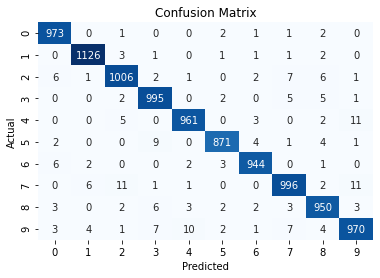

In [67]:
def confusion_martrix_multi(confu_martrix):
    sns.heatmap(confu_martrix, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xticks(ticks=np.arange(confu_martrix.shape[0]) + 0.5, labels=np.arange(10))
    plt.yticks(ticks=np.arange(confu_martrix.shape[1]) + 0.5, labels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
confusion_martrix_multi(conf_matrix_test)

In [68]:
precison_acc_test = precision_score(y_test, y_predict_test, average='macro')
print('precison_acc_test => ', precison_acc_test)

print('==='*20)

recall_acc_test = recall_score(y_test, y_predict_test, average='macro')
print('recall_acc_test =>', recall_acc_test)

print('==='*20)

class_repo_test = classification_report(y_test, y_predict_test)
print('class_repo_test  => \n', class_repo_test)


precison_acc_test =>  0.9791973966593345
recall_acc_test => 0.9790919842945065
class_repo_test  => 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

